# Week 12 : Introduction to classes in Python

A class allows you to create objects. Objects are instances of the class and they have attributes and methods attached to them. 
-    attributes represent its state, 
-    methods represent its behavior : using its methods, we can modify the object's state


## Structure of a class
A class has: 
+ a docstring "' ... "' to help the user to understand what's the purpose of the class
+ a $__init__$ part where you define all the attributes (variables) of the class
+ some methods (functions) 




In [ ]:
# An example of a class 

class Person:
  ''' 
  This class retains information about an Person object.
  It allows to print the person information and his work. 
  '''
  def __init__(self, name, sex, age, profession):
    # data members (instance variables)
    self.name = name
    self.sex = sex
    self.age = age
    self.profession = profession

  # Behavior (instance methods)
  def show(self):
    print('Name:', self.name, 'Sex:', self.sex, 'Profession:', self.profession)

  # Behavior (instance methods)
  def work(self):
    print(self.name, 'is working as a', self.profession)

  # Behavior (instance methods)
  def discount(self):
    if int(self.age) < 18:
      print(self.name, 'can is young enough and can have a discount')
    else: 
      print(self.name, 'is too old and can\'t have a discount')




In [ ]:
help(Person)

Help on class Person in module __main__:

class Person(builtins.object)
 |  Person(name, sex, age, profession)
 |  
 |  This class retains information about an Person object.
 |  It allows to print the person information and his work.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, sex, age, profession)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  discount(self)
 |      # Behavior (instance methods)
 |  
 |  show(self)
 |      # Behavior (instance methods)
 |  
 |  work(self)
 |      # Behavior (instance methods)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
print(Person.__doc__)

 
  This class retains information about an Person object.
  It allows to print the person information and his work. 
  


In [ ]:
# define a new object 
Elodie = Person('Elodie', 'Female', '23', 'Teaching Assistant')

# use the class  
Elodie.show()
Elodie.work()
Elodie.age
Elodie.discount()


Name: Elodie Sex: Female Profession: Teaching Assistant
Elodie is working as a Teaching Assistant
Elodie is too old and can't have a discount


## Example for a regression 



In [ ]:
# Import required packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [ ]:
sample = [[0.1, 0.2, 0],
          [0.3, 0.05, 0],
          [0.3, 0.2, 0],
          [0.7, 0.65, 1],
          [0.25, 0.3, 0],
          [0.85, 0.55, 1],
          [0.1, 0.45, 0],
          [0.9, 0.85, 1],
          [0.95, 0.55, 1],
          [0.8, 0.8, 1]
          ]
df = pd.DataFrame(sample, columns=['x1', 'x2', 'target'])

In [ ]:
class MyData:
  ''' 
  This class retain information about my data. 
  Works for a dataframe containing 3 columns. 
  '''
  def __init__(self, data):
    # data members (instance variables)
    self.data = data
    self.LR = LogisticRegression()

  # Behavior (instance methods)
  def view(self):
    print(df)

  # Behavior (instance methods)
  def scatterplot(self):
    ''' 
    set the (c) color of the map to vary by the "target" feature of the dataframe
    ''' 
    self.data.plot.scatter(x=self.data.columns[0], 
                           y=self.data.columns[1], 
                           c=self.data.columns[2], 
                           colormap='winter');
     
  # Behavior (instance methods)
  def logistic_regression(self): 
    ''' 
    Perform a logistic regression on the dataframe 
    1. Set 'X' containing dependent variables and 'y' containing independent variables
    '''

    X = self.data[[self.data.columns[0], self.data.columns[1]]] 
    y = self.data[self.data.columns[2]] 
    
    self.LR.fit(X, y)
    
    print('The coefficients of the logistic regression are ', self.LR.coef_)
    print('The intercept of the logistic regression is', self.LR.intercept_ )
    print('The prediction based on the logistic regression is', self.LR.predict(X))

     



     x1    x2  target
0  0.10  0.20       0
1  0.30  0.05       0
2  0.30  0.20       0
3  0.70  0.65       1
4  0.25  0.30       0
5  0.85  0.55       1
6  0.10  0.45       0
7  0.90  0.85       1
8  0.95  0.55       1
9  0.80  0.80       1
The coefficients of the logistic regression are  [[1.15013435 0.79371503]]
The intercept of the logistic regression is [-0.96836108]
The prediction based on the logistic regression is [0 0 0 1 0 1 0 1 1 1]


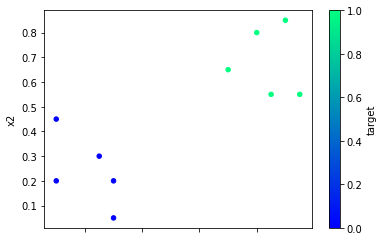

In [ ]:
# create my first new object 
Test1 = MyData(df)

Test1.view()
Test1.scatterplot()
Test1.logistic_regression()

## How can classes be useful for the project ? 

We will show an example on the amazon review dataset which is available on the git under the folder 'data' of 'week9'. 


In [ ]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



# Import stopwords from English language
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
# Load data
url = "https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week9/data/amazon_alexa.tsv"
df = pd.read_csv(url, delimiter="\t")
df.sample(10)

,rating,date,variation,verified_reviews,feedback
1308,5,22-Jul-18,Black Spot,Love it. So great to use!!!,1
2210,5,30-Jul-18,Configuration: Fire TV Stick,Ease of usage,1
1157,5,29-Jul-18,Black Spot,"Perfect! May favorite Alexa device by far, spe...",1
194,4,29-Jul-18,Heather Gray Fabric,So far it has worked well. Not always intuitiv...,1
546,5,15-Jun-18,White,it works good. very satisfied,1
1452,5,30-Jul-18,Black Show,I'm loving my new Echo Show. The video screen ...,1
1322,5,21-Jul-18,Black Spot,I got this on Prime day and figured I'd see wh...,1
908,5,29-Jul-18,Charcoal Fabric,Home entertainment,1
2845,5,30-Jul-18,Black Dot,This was an impulse buy but turns out I really...,1
790,5,30-Jul-18,Charcoal Fabric,"We like it all so far, but have a lot to try o...",1


In [ ]:
class Cleantext:
  ''' 
  This class allows you to perform some cleaning of text data.  
  '''
  def __init__(self, data, text):
    # attributed (instance variables)
    self.data = data
    self.text = text
    self.punctuations = string.punctuation
    self.stop_words = spacy.lang.en.stop_words.STOP_WORDS
    


  # Behavior (instance methods)
  def todate(self):
    ''' 
    Change the date to datetime
    ''' 
    self.data["date"] = pd.to_datetime(self.data["date"])
    self.data.info()


In [ ]:
testA = Cleantext(df, df['verified_reviews'])

testA.todate()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


In [ ]:
class sentence:
  ''' 
  This class allows you to perform some cleaning of text data.  
  '''
  def __init__(self, sentence):
    # attributed (instance variables)
    self.sentence = sentence
    self.punctuations = string.punctuation #list of all punctuations possible
    self.stop_words = spacy.lang.en.stop_words.STOP_WORDS #list of stopwords
    
  def __repr__(self):
    return self.sentence
    
  def spacy_tokenizer(self):

      sp = spacy.load('en_core_web_sm') 
      mytokens = sp(self.sentence)
      stop_words = self.stop_words #list of stopwords
      punctuations = self.punctuations #list of all punctuations possible

      mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
      mytokens = [ word for word in mytokens if word not in self.stop_words and word not in self.punctuations ]
      self.tokens = mytokens
      return mytokens

  def lowercase(self):
    self.sentence = self.sentence.lower()
    return self.sentence



In [ ]:
test = sentence("Perfect for kids, adults and everyone in betw")
#test.spacy_tokenizer()
test.lowercase()

'perfect for kids, adults and everyone in betw'